# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Excel Data Read

In [3]:
data = pd.read_excel('TestDataset.xlsx',index=0)

In [4]:
data.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,Week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [5]:
data.describe()

,MarketID,LocationID,AgeOfStore,Promotion,Week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


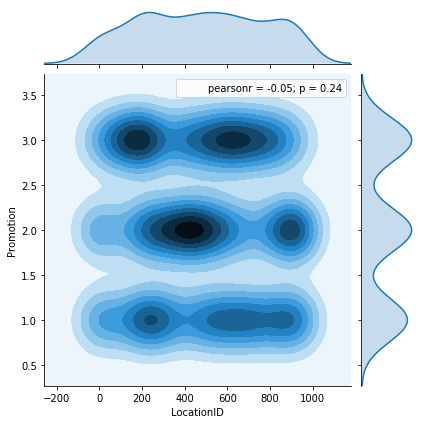

In [6]:
sns.jointplot(data["LocationID"],data["Promotion"],kind="kde")

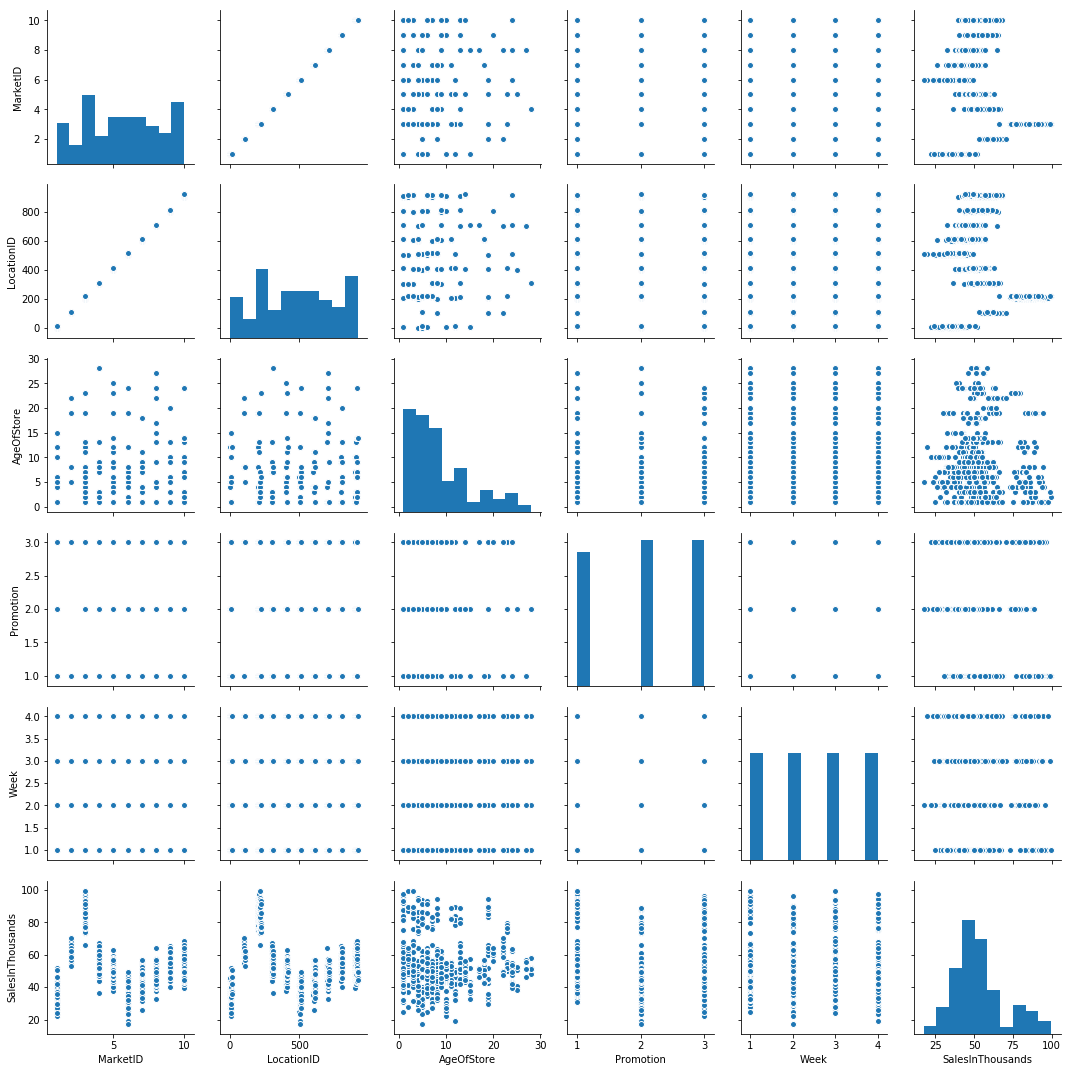

In [7]:
sns.pairplot(data)

# Spliting Data into Train and test

In [8]:
from sklearn.cross_validation import train_test_split

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# First Regression Model

1) Independent Variables - MarketID, AgeOfSource, LocationID, Promotion 
2) Dependent Variables - SalesInThousands

In [9]:
X = data[['MarketID','AgeOfStore','LocationID','Promotion']]
y = data['SalesInThousands']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=101)

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
dtree1 = DecisionTreeRegressor()

In [13]:
dtree1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [14]:
prediction = dtree1.predict(X_test)

In [15]:
from sklearn import metrics

Calculation of Mean Square Error, Roor Mean Square Error and Absolute Mean Square Error

In [16]:
print "MAE: %f"%(metrics.mean_absolute_error(y_test,prediction))
print "MSE: %f"%(metrics.mean_squared_error(y_test,prediction)) 
print "RMSE: %f"%(np.sqrt(metrics.mean_squared_error(y_test,prediction))) 

MAE: 4.714667
MSE: 33.753602
RMSE: 5.809785


# Accuracy Calculation

In [17]:
dtree1.score(X_test,y_test)

0.8792736169266508

# Accuracy Graphical Representation

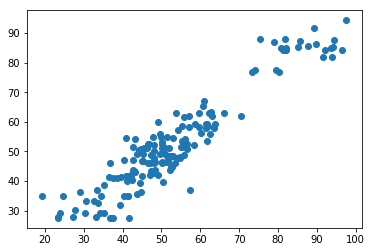

In [18]:
plt.scatter(y_test,prediction)

Converting non-integer value to integer to apply Second Regression Model

In [19]:
data['MarketSize'][data['MarketSize'] == 'Small']=0
data['MarketSize'][data['MarketSize'] == 'Medium']=1
data['MarketSize'][data['MarketSize'] == 'Large']=2

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
data.columns

Index([u'MarketID', u'MarketSize', u'LocationID', u'AgeOfStore', u'Promotion',
       u'Week', u'SalesInThousands'],
      dtype='object')

# Second Regression Model

1) Independent Variables - MarketSize, Promotion, week 
2) Dependent Variables - SalesInThousands

In [21]:
X = data[['MarketSize','Week','Promotion']]
y = data['SalesInThousands']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=101)

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
dtree = DecisionTreeRegressor()

In [25]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

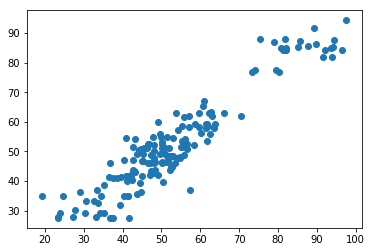

In [26]:
plt.scatter(y_test,prediction)

In [27]:
print "MAE: %f"%(metrics.mean_absolute_error(y_test,prediction))
print "MSE: %f"%(metrics.mean_squared_error(y_test,prediction)) 
print "RMSE: %f"%(np.sqrt(metrics.mean_squared_error(y_test,prediction))) 

MAE: 4.714667
MSE: 33.753602
RMSE: 5.809785


In [28]:
dtree.score(X_test,y_test)

0.5508722434841569

# Using SVM method to check the accuracy

In [29]:
from sklearn.svm import SVR

In [30]:
model = SVR()

In [31]:
model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [32]:
pred = model.predict(X_test)

# Accuracy Check

In [33]:
model.score(X_test,y_test)

0.28535852496816916

# Implemingting Grid Search Method for better Accuracy

In [34]:
from sklearn.grid_search import GridSearchCV

/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [35]:
params_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [36]:
grid = GridSearchCV(SVR(),params_grid,verbose=3)

In [37]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.043600 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ........................ C=0.1, gamma=1, score=-0.118146 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.052997 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.006018 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...................... C=0.1, gamma=0.1, score=-0.164608 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.017659 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.185592 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.290297 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.096544 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ........................ C=1, gamma=0.1, score=-0.043486 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.127665 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.008271 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ....................... C=1, gamma=0.01, score=-0.167698 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [38]:
grid.best_estimator_

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
grid.best_params_

{'C': 100, 'gamma': 0.1}

# Accuracy Calculation

In [40]:
grid.score(X_test,y_test)

0.5474664826710995

# Visualization Graph requested

1) Give a visual representation to show how promotions in a particular market size effects the sales figure

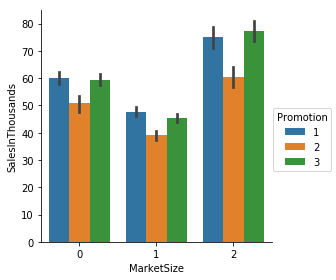

In [41]:
sns_plot = sns.factorplot(x="MarketSize",y='SalesInThousands',hue='Promotion',data=data,kind="bar")
sns_plot.savefig("output.png")

2) Visually represent how the age of a store in particular location id effects the sales.

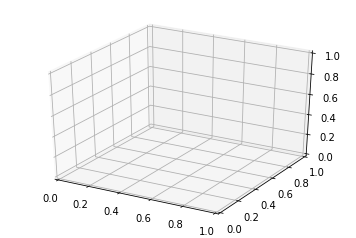

In [42]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

In [43]:
ax.plot_trisurf(data['AgeOfStore'], data['LocationID'], data['SalesInThousands'],cmap='viridis', edgecolor='none');

<Figure size 792x504 with 0 Axes>

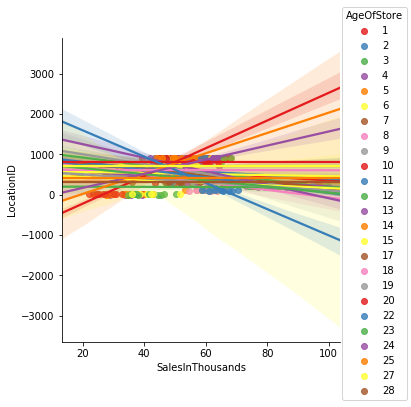

In [46]:
plt.figure(figsize=(11,7))
new = sns.lmplot(y='LocationID',x='SalesInThousands',data=data,hue='AgeOfStore',palette='Set1')
new.savefig("output2.png")